In [1]:
#description: This program uses the moving average convergence/Divergence crossove

In [1]:
#import the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
data=pd.read_csv(r'D:\Users\Mobisium\Downloads\datasets_19256_25044_AAPL.csv')

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...,...
179,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
180,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
181,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
182,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


In [5]:
data=data.set_index(pd.DatetimeIndex(data['Date'].values))

data

,Date,Open,High,Low,Close,Adj Close,Volume
2014-09-29,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...,...
2018-03-05,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
2018-03-12,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
2018-03-19,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
2018-03-26,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


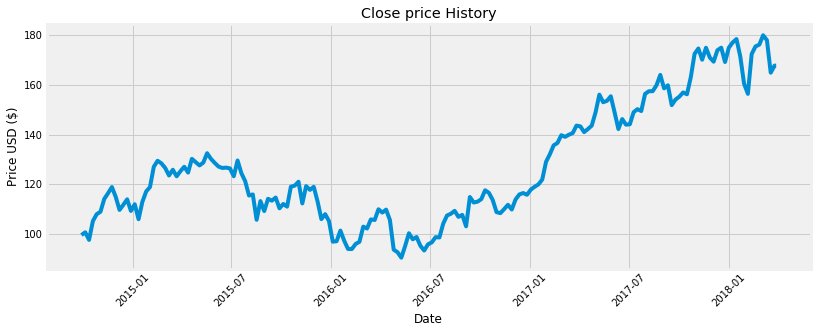

In [8]:
#visually show the stock price

plt.figure(figsize=(12.2,4.5))
plt.plot(data['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [11]:
#calculate the MACD and signal line indictors
#Calculate the short term exponential moving average (EMA)
ShortEMA=data.Close.ewm(span=12, adjust=False).mean()

#Calculate the short term exponential moving average (EMA)
LongEMA= data.Close.ewm(span=26, adjust=False).mean()

#Calculate the MACD line

MACD= ShortEMA - LongEMA

#calculate the signal line

signal= MACD.ewm(span=9, adjust=False).mean()


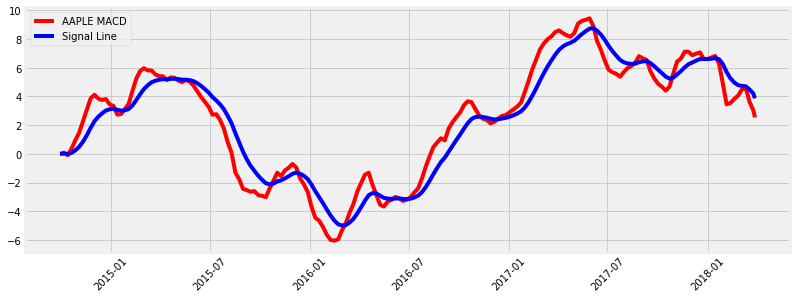

In [16]:
#plot the chart

plt.figure(figsize=(12.2,4.5))
plt.xticks(rotation=45)
plt.plot(data.index, MACD, label="AAPLE MACD", color='red')
plt.plot(data.index, signal, label='Signal Line',color='blue')

plt.legend(loc="upper left")

In [17]:
#create new columns for the data

data['MACD']= MACD
data['Signal Line']= signal

#show the data

data

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
2014-09-29,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700,0.000000,0.000000
2014-10-06,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200,0.088547,0.017709
2014-10-13,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800,-0.087191,-0.003271
2014-10-20,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900,0.378396,0.073063
2014-10-27,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600,0.960626,0.250576
...,...,...,...,...,...,...,...,...,...
2018-03-05,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700,4.490403,4.731596
2018-03-12,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500,4.624384,4.710154
2018-03-19,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700,3.633237,4.494770
2018-03-26,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400,3.041845,4.204185


In [20]:
#create a function to signal when to buy and sell an assest

def buy_sell(signal):
    Buy=[]
    Sell=[]
    flag=-1
    
    for i in range(0, len(signal)):
        if signal['MACD'][i]> signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag!=1:
                Buy.append(signal['Close'][i])
                flag=1
            else:
                Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag!=0:
                Sell.append(signal['Close'][i])
                flag=0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)

    return(Buy, Sell)
            
                
            
        
        



In [21]:
# Create buy and sell column
a=buy_sell(data)
data['Buy_Signal_Price']=a[0]
data['Sell_Signal_Price']=a[1]


In [22]:
#show the data

data

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2014-09-29,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700,0.000000,0.000000,NaN,NaN
2014-10-06,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200,0.088547,0.017709,100.730003,NaN
2014-10-13,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800,-0.087191,-0.003271,NaN,97.669998
2014-10-20,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900,0.378396,0.073063,105.220001,NaN
2014-10-27,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600,0.960626,0.250576,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-03-05,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700,4.490403,4.731596,NaN,NaN
2018-03-12,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500,4.624384,4.710154,NaN,NaN
2018-03-19,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700,3.633237,4.494770,NaN,NaN
2018-03-26,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400,3.041845,4.204185,NaN,NaN


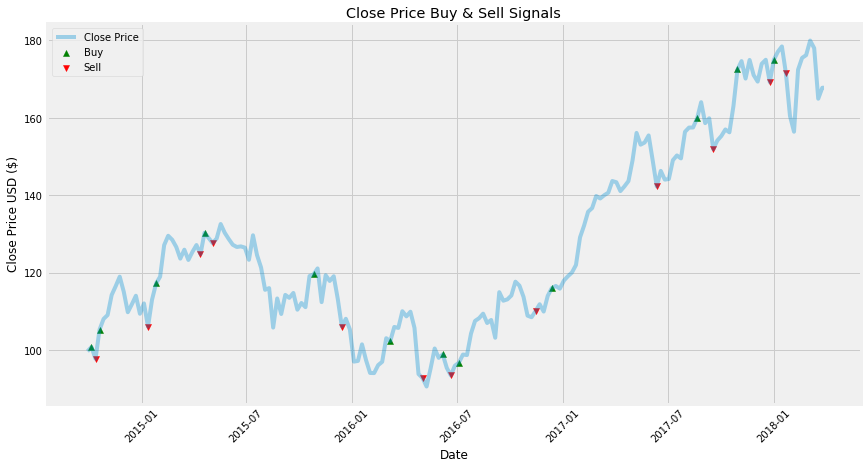

In [28]:
#visiually show the stock buy and sell signal

plt.figure(figsize=(13,7))

plt.scatter(data.index, data['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(data.index, data['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(data['Close'], label='Close Price', alpha=0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()